# Part I: The finite difference method and basic scipy usage


In this part we will introduce the finite difference method to numerically solve differential equations. This will be illustrated with Pyhton examples which use basic SciPy features. 

## Finite difference approach

Many physical proporties are defined as differentials (e.g. position, velocity and acceleration). While this leads to exact solutions for quantities that can be differentiated analytically, we need tools to approximately solve equations that have no exact solution.

In [1]:
import numpy as np # Numerical methods
import matplotlib.pyplot as plt # plotting tools
import matplotlib as mpl # plotting tools
%matplotlib inline

Let's get started by loading two basic scipy libraries: **numpy** and **matplotlib**. 

The basic command names in numpy and Matlab are similar, so if you are used to Matlab you should easily understand the code. Refer to http://mathesaurus.sourceforge.net/matlab-numpy.html for an overview of differences between numpy and Matlab. Note that any numpy function has the prefix "np.", short for numpy (see above). The same goes for functions from matplotlib.pyplot, which are addressed with the prefix "plt". This is to avoid double declaration of functions from different packages and to speedup the initialization of the code. If you find this notation cumbersome, you also import entire library using

    from numpy import *
    from matplotlib.pyplot import *    

and then use the functions without prefix, e.g. x = linspace(0,pi,100).

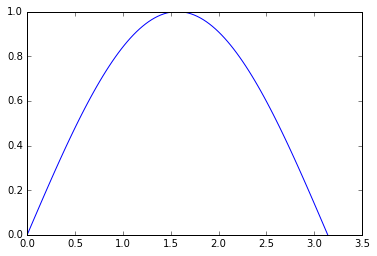

In [2]:
x = np.linspace(0,np.pi,100)
f = np.sin(x)
plt.plot(x,f); # ';' is used to suppress any output

Any continuous function $f(x)$ can be approximated using its Taylor series
$$f(x+\Delta x)=f(x)+\Delta x\cdot f'(x)+\frac{1}{2}\Delta x^2\cdot f''(x)+{\mathcal O}(x^3).$$
So the first derivative is given by $$f'(x)=\frac{f(x+\Delta x)-f(x)}{\Delta x}+{\mathcal O}(\Delta x).$$

Let us now implement this into Python. We first define a data point x0 and the step size dx:

In [21]:
x0 = 0.9
dx = 0.0001

Next, we write out the formula for the function $f(x)$ (here $\sin(x)$):

In [22]:
f1 = (np.sin(x0+dx)-np.sin(x0))/dx

Again, we plot the results. This time we also use xlim and ylim to adjust the extent of the figure.

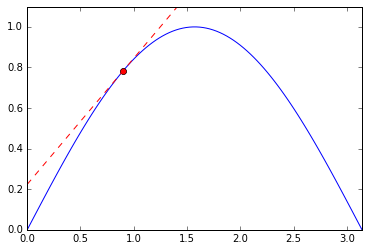

In [23]:
plt.plot(x,f)
plt.plot([x0,(x0+dx)],[np.sin(x0),np.sin(x0+dx)],'ro')
plt.plot(x,f1*(x-x0)+np.sin(x0),'r--')
plt.ylim(0,1.1)
plt.xlim(0,np.pi); 

For large $\Delta x$ this approximation is not accurate, which is very clear when we also plot the actual derivate $f'(x_0)=\cos(x_0)$:

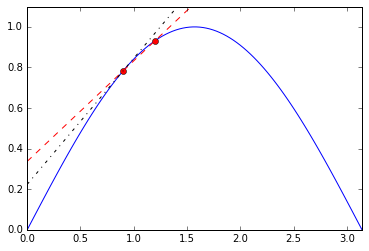

In [6]:
plt.plot(x,f)
plt.plot([x0,(x0+dx)],[np.sin(x0),np.sin(x0+dx)],'ro')
plt.plot(x,f1*(x-x0)+np.sin(x0),'r--')
plt.plot(x,np.cos(x0)*(x-x0)+np.sin(x0),'k-.')

plt.ylim(0,1.1)
plt.xlim(0,np.pi); 

In fact, we see from the above equation that the error for this forward difference scheme is of the order of ${\mathcal O}(\Delta x)$. However, we can combine the forward difference ($x+x_0$) with the backward difference ($x-x_0$)
$$f(x+\Delta x)=f(x)+\Delta x\cdot f'(x)+\frac{1}{2}\Delta x^2\cdot f''(x)+{\mathcal O}(x^3)$$
$$f(x-\Delta x)=f(x)-\Delta x\cdot f'(x)+\frac{1}{2}\Delta x^2\cdot f''(x)+{\mathcal O}(x^3).$$
Subtracting them we get 
$$ f'(x)=\frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}+{\mathcal O}(\Delta x^2). $$
This is the so-called central difference scheme. It is widely used due to its much better ${\mathcal O}(\Delta x^2)$ scaling.

In [7]:
f1c = (np.sin(x0+dx)-(np.sin(x0-dx)))/(2*dx)

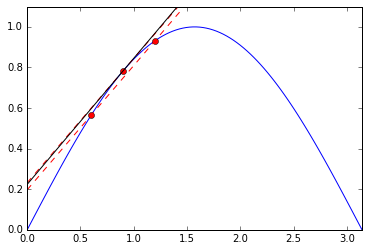

In [8]:
plt.plot(x,f)
plt.plot([(x0-dx),x0,(x0+dx)],[np.sin(x0-dx),np.sin(x0),np.sin(x0+dx)],'ro')
plt.plot(x,f1c*(x-x0)+np.sin(x0),'r--')
plt.plot(x,f1c*(x-x0+dx)+np.sin(x0-dx),'r--')

plt.plot(x,np.cos(x0)*(x-x0)+np.sin(x0),'k')

plt.ylim(0,1.1)
plt.xlim(0,np.pi); 

With the same approach, we find a 2nd order expression for the 2nd derivative:

$$f''(x)=\frac{f(x+\Delta x)-2\cdot f(x)+f(x-\Delta x)}{\Delta x^2}+{\mathcal O}(\Delta x^2)$$ 

### Python functions
The above calculation were done explicitly for $\sin(x)$. Let us now introduce python functions, which will allow us to define arbitrary functions and call them as needed.

* The key syntax consists of def, () and :, the body is indented.
* Functions can also return several objects (e.g. return(x, a, b)) or nothing (no return statement).
* Similarly, functions can be defined with no arguments

In [9]:
def f(x):
    f = np.cos(x)
    return f

So this function f(x) takes x (an int, double or list) and calculates the value of the cosine for this argument. The value is then returned and can be assigned to a variable, e.g. to 'y'
   
    y = f(x)
    
Next, we will define functions for the first (d1) and second (d2) derivatives using the central difference schemes. 
* Note that these functions use a new feature, default values. In this case dx has a value of 1e-10 by default, but can be assigned as well.

In [10]:
def d1(f,x,dx=1e-5):
    d1 = (f(x+dx)-f(x-dx))/(2*dx)
    return d1
    
def d2(f,x,dx=1e-5):
    d2 = (f(x+dx)-2*f(x)+f(x-dx))/dx**2
    return d2

In [11]:
print d1(f,x0)
print d1(f,x0,1e-2)

-0.783326909609
-0.783313854244


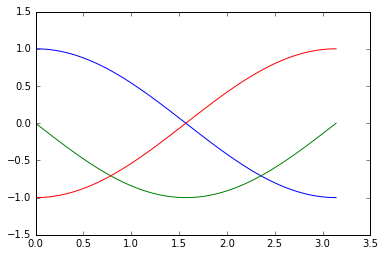

In [12]:
plt.plot(x,f(x))
plt.plot(x,d1(f,x))
plt.plot(x,d2(f,x));

## Discretization and simulation of the EM-Wave equation

The 1D EM wave equation in vacuum ($\epsilon=1$) is

$$
 \frac{\partial^2E}{\partial t^2}=c^2\frac{\partial^2 E}{\partial x^2},
$$
which is an ordinary, second order differential equation. Using the central difference scheme, we can convert it to a so-called difference equation: 

$$
 \frac{1}{\Delta t^2}(E(i\Delta x,(k+1)\Delta t)-2E(i\Delta x,k\Delta t)+E(i\Delta x,(k-1)\Delta t)= 
\frac{c^2}{\Delta x^2}(E(k\Delta x,(i+1)\Delta t)-2E(k\Delta x,i\Delta t)+E(k\Delta x,(i-1)\Delta t).
$$

For better legibility, the following writing convention is used in the literature

$$E^k_i:=E(i\Delta x, k\Delta t). $$

So in the above case

$$
 \frac{1}{\Delta t^2}(E_i^{k+1}-2E_i^k+E_i^{k-1})=\frac{c^2}{\Delta x^2}(E^k_{i+1}-2E^k_i+E^k_{i-1}).
$$

We can rearrange this equation to calculate the new ($[k+1]\Delta t=k+1$) field at a position $i\Delta x=i$: 

$$
E^{k+1}_i= 2(1-\rho^2)E_i^k-E^{k-1}_i+\rho^2(E^k_{i+1}+E^k_{i-1})
$$
Note that we also use the substitution $\rho:=c\frac{\Delta t}{\Delta x}$.

The nature of such an algorithm can be illustrated using a computation molecule or stencil.

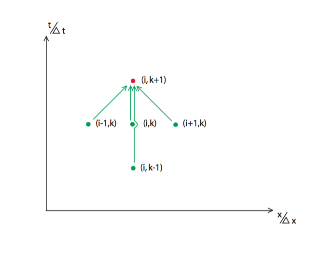

In [13]:
img=mpl.image.imread('FDTD_stencil.png');plt.imshow(img);plt.axis('off');

### Dispersion relation and Courant condition

Assuming that we solution of the wave equation have the form a propagating wave $E_0e^{i(kx-\omega t)}$, we can deduce some information about the dispersion properties of the discretized formula.

$$  e^{i(\omega(n+1)\Delta t-\tilde k i\Delta x)}  =2(1-\rho^2)e^{i(\omega(n)\Delta t-\tilde k i\Delta x)}-e^{i(\omega(n-1)\Delta t-\tilde k i\Delta x)}   +\rho^2\{ e^{i(\omega(n)\Delta t-\tilde k (i+1)\Delta x)} + e^{i(\omega(n+1)\Delta t-\tilde k (i-1)\Delta x)}\}
 $$
 
This can be rearranged into 

$$ \cos(\omega\Delta t)=\rho^{-2}[\cos(\tilde k \Delta x)-1]+1 $$

and with $\cos(x)-1 = \frac12\sin^2(\frac{x}{2})$ this becomes

$$ \rho^2 \sin^2\left( \frac{\omega\Delta t}{2} \right) =\sin^2\left( \frac{k\Delta x}{2} \right) $$

We can now solve this for $\omega$

$$ \omega = \pm \frac{2}{\Delta t} \arcsin\left( \rho \sin\left( \frac{k\Delta x}{2} \right) \right) $$

and find the **numerical phase velocity** $v_{\phi}=\omega/k$

$$ v_{\phi} = \pm \frac{2}{k\Delta t} \arcsin\left( \xi \right). $$

The $\arcsin$ function only yields to real results if the argument $\xi = \rho \sin\left( \frac{k\Delta x}{2} \right)$ is between -1 and 1. Therefore we find that the solution can only produce physical results for 

$$ \rho \leq 1$$

or

$$ c\Delta t \leq \Delta x, $$

which is widely known as the **CFL** or **Courant** limit, named after a paper by Courant, Friedrich and Levy. **Note that it is imperative for any electrodynamic simulation to fulfill this condition!** This limits the speed of the code, because to increase the spatial resolution, the time resolution needs to be adapted as well. The duration of a simulation therefore scales with $(1/\Delta x)^2$. 

But even if the time step is chosen according to the Courant condition, we see that the numerical phase velocity can be different from the real physical phase velocity (which should be $c$ in vacuum). To illustrate this, we implement the equation in python.

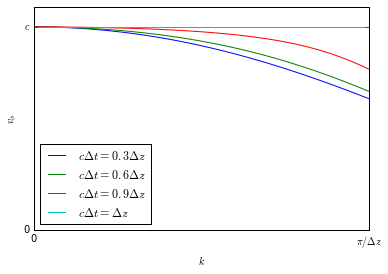

In [14]:
dx = 1
k = np.linspace(1e-10,np.pi/dx)

def vp(k,dt):
    vp = 2/(k*dt)*np.arcsin(dt/dx*np.sin(k*dx/2))
    return vp

plt.plot(k,vp(k,0.3),label='$c\Delta t = 0.3\Delta z$')
plt.plot(k,vp(k,0.6),label='$c\Delta t = 0.6\Delta z$')
plt.plot(k,vp(k,0.9),label='$c\Delta t = 0.9\Delta z$')
plt.plot(k,vp(k,1.0),label='$c\Delta t = \Delta z$')

plt.legend(loc=3)

plt.xlabel('$k$')
plt.ylabel('$v_{\phi}$')

plt.xticks([0,np.pi],['0','$\pi/\Delta z$'])
plt.yticks([0,1],['0','$c$'])

plt.ylim(0,1)
plt.xlim(0,np.pi)
plt.ylim(0,1.1);

So we see that the wave propagates slower the shorter the wavelength.

#### Sidenote: New matplotlib commands
* You can add the label argument to a plot and then use plt.legend to add a legend to your graphs.
* You can label the axes via plt.xlabel or plt.ylabel. Note that matplotlib accepts latex input when you use "$$".
* With plt.xticks and plt.yticks you can define the exact position and label or the axis ticks.

### Nyquist criterion

Another important criterion is the resolution. Basically, the numerical resolution has to be high enough to resolve all relevant frequencies: For a laser pulse it has to resolve the laser frequency; for a plasma wave the plasma frequency. In underdense plasmas the resolution is therefore determined by the laser wavelength $\lambda_0$, in overdense plasmas by the plasma wavelength $\lambda_p$. As a rule of thumb the resolution should be at least $\Delta x < \lambda/20$ or $\Delta x < 0.3k^{-1}$.

Resolution per lambda:  19.8
Resolution per lambda:  9.8
Resolution per lambda:  1.8
Resolution per lambda:  0.8


(0.0, 3.141592653589793)

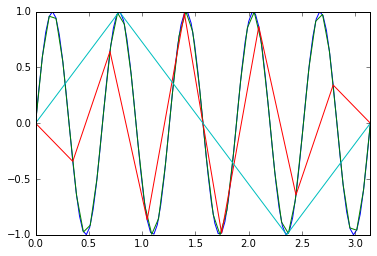

In [23]:
start = 0.
end   = np.pi
freq  = 10

x1 = np.linspace(start,end,100)
x2 = np.linspace(start,end,50)
x3 = np.linspace(start,end,10)
x4 = np.linspace(start,end,5)

print 'Resolution per lambda: ',(np.pi*2/10)/(x1[1]-x1[0])
print 'Resolution per lambda: ',(np.pi*2/10)/(x2[1]-x2[0])
print 'Resolution per lambda: ',(np.pi*2/10)/(x3[1]-x3[0])
print 'Resolution per lambda: ',(np.pi*2/10)/(x4[1]-x4[0])

plt.plot(x1,np.sin(10*x1))
plt.plot(x2,np.sin(10*x2))
plt.plot(x3,np.sin(10*x3))
plt.plot(x4,np.sin(10*x4))

plt.xlim(start,end)

### Boudary Conditions

Let us now get back to the finite difference form of the wave equation

$$
E^{k+1}_i= 2(1-\rho^2)E_i^k-E^{k-1}_i+\rho^2(E^k_{i+1}+E^k_{i-1})
$$

While it seems straightforward to calculate the field value at (i,k+1), a problem arrises when we consider the entire field mesh of data points

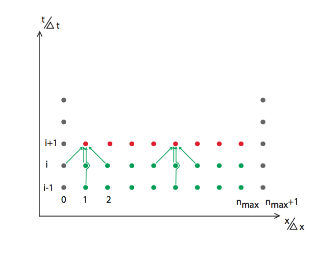

In [15]:
img=mpl.image.imread('FDTD_boundaries.png');plt.imshow(img);plt.axis('off');

As shown in the illustration, two spatial points less are calculated at each time iteration. This means that even given a very large initial mesh, we would quickly run out of data points. This is why we need to define **boundary conditions**. The most common boundary conditions are
* Reflecting boundary conditions: In this case, the field value at the border is time independent and defined as zero. As a results, any EM wave reaching the boundary is reflected.
* Periodic boundary confitions: Here, the last cell is connected to the first, so a wave leaving on one side re-enters on the other.
* Open/absorbing boundary conditions: This is the ideal case, in which waves just leave as if they were in a larger sinulation space. However, as we will see, this is more difficult to implement.

Let us now implement the boundary conditions to simulate the propagation of a 1D laser pulse in vacuum.

#### Reflecting boundary conditions

So, first of all, we will define a function that returns the laser field for a beam with gaussian envelope.

In [16]:
def laser(x,dt):
    lambda_0 = 1 # define everything in micrometer
    c = 3e8*1e6
    ctau = 1
    start = 0.
    xt = x-c*dt
    E = np.sin(xt/lambda_0*2*np.pi)*np.exp(-(xt)**2/(2*ctau**2))
    return E

Next, we define the simulation parameters, i.e. the number of spatial grid points nx and the total number of iterations. The timestep is chosen to be 0.99dx/c, so that CFL < 1. (You can try what happens if the CFL number is greater than 1)

In [17]:
nx = 300
niter = 30

xmin = -10
xmax = 10

x = np.linspace(xmin,xmax,nx)
dx = x[1]-x[0]

c = 3e8*1e6
dt = .9*dx/c

rho = c*dt/dx
print 'The CFL number is', rho

The CFL number is 0.9


The implementation of the code is straightforward:
* Each iteration a new array of zeros is initialized.
* The results from the algoritm are written in all cells except the boundaries, i.e. [1:-1]. Beware of the difference to Matlab, where it would be (2:end-1).
* After this, the oldest field values (i-1) are overwritten with (i) into E0. Then the new fields are transfered into E1. Then the algorithm can be repeated.

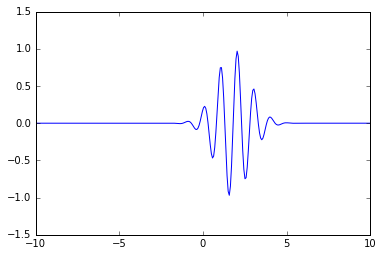

In [18]:
from IPython import display # we only need this to udpate the plot, nothing to do with the algorithm

E0 = laser(x,-dt)
E1 = laser(x,0)

for i in range(0,niter):
    E2 = np.zeros(np.shape(E0))
    E2[1:-1] = 2*(1-rho**2)*E1[1:-1] - E0[1:-1] + rho**2*(E1[2:]+E1[:-2])
    E0 = E1
    E1 = E2
    if np.mod(i,5)==0:
        plt.plot(x,E2)
        plt.show()
        plt.ylim(-1.5,1.5)
        display.clear_output(wait=True)
        
plt.plot(x,E2); # just there to display final iteration

Note: In the literature, reflecting boundary conditions are often referred to as Dirichlet or von Neumann conditions:
* The **Dirichlet condition** sets the field to zero at the border.
* The von **Neumann consition** sets its derivative to zero (which leads to the same results if no field is initialized)

#### Periodic boundary conditions

Let's modify the code for periodic boundary conditions.

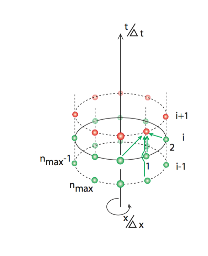

In [19]:
img=mpl.image.imread('FDTD_periodic.png');plt.imshow(img);plt.axis('off');

The code is largely similar, but we need to manually add the boundary conditions (for reflecting boundaries this could be conveniently done with the initialization). So this code includes the aditional lines

    E2[0] = 2*(1-rho**2)*E1[0] - E0[0] + rho**2*(E1[1]+E1[-1])
    E2[-1] = 2*(1-rho**2)*E1[-1] - E0[-1] + rho**2*(E1[0]+E1[-2])

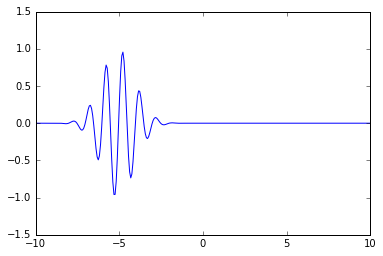

In [20]:
niter = 250

E0 = laser(x,-dt)
E1 = laser(x,0)

for i in range(0,niter):
    
    E2 = np.empty(np.shape(E0))
    E2[1:-1] = 2*(1-rho**2)*E1[1:-1] - E0[1:-1] + rho**2*(E1[2:]+E1[:-2])
    E2[0] = 2*(1-rho**2)*E1[0] - E0[0] + rho**2*(E1[1]+E1[-1])
    E2[-1] = 2*(1-rho**2)*E1[-1] - E0[-1] + rho**2*(E1[0]+E1[-2])
    
    E0 = E1
    E1 = E2
    
    if np.mod(i,5)==0:
        plt.plot(x,E2)
        plt.show()
        plt.ylim(-1.5,1.5)
        display.clear_output(wait=True)
        
plt.plot(x,E2);

#### Absorbing boundary conditions

As mentioned earlier, reflecting and periodic boundary conditions are not physical: parts of the EM wave can re-enter the simulation box and perturb the results. This effect is less pronounced the bigger the simulation box, yet the size of the latter is limited by numerical constraints. Instead, **absorbing boundary conditions (ABCs)** are used.

As you can see in the next example, ABCs can be accurately model free propagation and the laser can leave the simulation box without reflections etc.

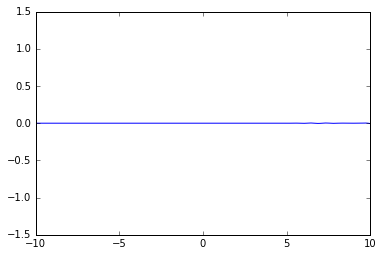

In [21]:
niter = 400
dt = .5*dx/c
rho = c*dt/dx

E0 = laser(x,-dt)
E1 = laser(x,0)

for i in range(0,niter):
    
    E2 = np.empty(np.shape(E0))
    E2[1:-1] = 2*(1-rho**2)*E1[1:-1] - E0[1:-1] + rho**2*(E1[2:]+E1[:-2])
    E2[0] = E0[1]
    E2[-1]=E0[-2]
    
    E0 = E1
    E1 = E2
    
    if np.mod(i,5)==0:
        plt.plot(x,E2)
        plt.show()
        plt.ylim(-1.5,1.5)
        display.clear_output(wait=True)
        
plt.plot(x,E2);

However, the above is a special case. For $\rho=0.5$ the wave needs two time steps to pass from one spatial grid point to the next, so the signal can get easily cancelled by introducing the conditions

$$ E^i_0=E^{i-2}_1 \qquad , \qquad E^i_{n_{max}}=E^{i-2}_{n_{max}}.$$

While this is an elegant and simple solution, it only works well for dispersion-free simulations in 1-D. In dispersive media, the variations within the phase velocity for different wavelength will cause this method to break down. It also does not work for 2-D or 3-D simulations.

The most common method is PML, perfectly matched layer. Here a layer is "perfectly matched" to the wave so that the wave can pass without being reflected. Once inside the layer region the wave is artificially damped.

### Summary and code example

Let us now summarize the functions we have been using so far and use them to create a short program called run_example. We will also include a few new features:
* You can use the **input()** function to allow user input after execution of the code, which can be easier for users than modifying the variables in the code itself.
* Users can select the boundary condition and an **if** request is used to select the part of the code that should be run in either case. **The key syntax of if is similar to def, consisting of if, the condition and :, the body is indented.** You can use **'=='** for equal, **'!='** for unequal, '<' smaller, '>' greater etc. Conditions can be coupled using **'and'** (not '&' or the like!).

In [22]:
def laser(x,t):
    lambda_0 = 0.8
    tau = 3
    start = 0
    
    c = 3e8*1e6
    ctau = tau*1e-15*c
    xt = x-c*t
    
    E = np.sin(xt/lambda_0*2*np.pi)*np.exp(-(xt)**2/(2*ctau**2))
    return E

def fd1d(xmin,xmax,nx,niter,boundary=0,rho=.7):
    x = np.linspace(xmin,xmax,nx)
    dx = x[1]-x[0]
    dt = rho*dx/c    
    E0 = laser(x,-dt)
    E1 = laser(x,0)

    for i in range(0,niter):
        E2 = np.empty(np.shape(E0))   
        
        if boundary == 0 & 1 ==1:
            E2 = np.zeros(np.shape(E0))
            E2[1:-1] = 2*(1-rho**2)*E1[1:-1] - E0[1:-1] + rho**2*(E1[2:]+E1[:-2])
            E2[0] = 0
            E2[-1]= 0
            
        if boundary == 1:

            E2[1:-1] = 2*(1-rho**2)*E1[1:-1] - E0[1:-1] + rho**2*(E1[2:]+E1[:-2])
            E2[0] = E0[1]
            E2[-1]=E0[-2]
            
        E0 = E1
        E1 = E2

    return x,E2

def run_example():
    nx = input('number of x grid points: ')
    niter = input('number of time steps: ')
    boundary = input('Boundary condition? \n 0 - Reflecting\n 1 - Periodic :\n ')
    xmin = -10
    xmax = 10
    (x,E) = fd1d(xmin,xmax,nx,niter,boundary)
    plt.plot(x,E)

In [23]:
from example_00 import *

number of x grid points: 100
number of time steps: 200
Boundary condition? 
 0 - Reflecting
 1 - Periodic :
 1


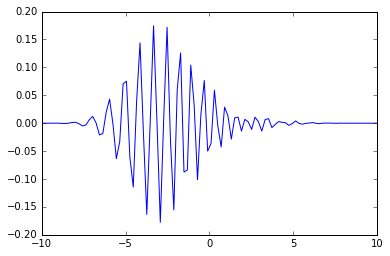

In [24]:
run_example()

### Discretization of Maxwell's equations



While the EM wave equation is a 2nd order PDE, Maxwell's equations
$$
\nabla\times\vec {B} =\frac{4\pi\vec {j}}{c}+\frac{1}{c}\frac{\partial\vec {E}}{\partial t} \qquad \nabla\cdot\vec {B}  =0 \\
\nabla\times\vec {E} =-\frac{1}{c}\frac{\partial\vec {B}}{\partial t} \qquad
 \nabla\cdot\vec {E}  =4\pi\rho
$$
are a system of two coupled 1st order PDEs.

As before, we will only consider the 1-D vacuum case, i.e. the dynamic parts of Maxwell's equation reduce to

$$
\partial_t E_x = -c \partial_z B_y $$

$$\partial_t B_y  = -c \partial_z E_x 
$$

Again, we can discretize these equations with the central difference scheme, which leads to

$$\frac{E_k^{i+1/2}-E_k^{i-1/2}}{\Delta t}=-c \frac{B^i_{k+1/2}-B^i_{k-1/2}}{\Delta x}$$

$$\frac{B_{k+1/2}^{i+1}-B_{k+1/2}^{i}}{\Delta t}=-c \frac{E^{i+1/2}_{k+1}-E^{i+1/2}_k}{\Delta x}$$

Due to the mixing of time and space differentials, electric and magnetic fields are evaluated on two different grids.

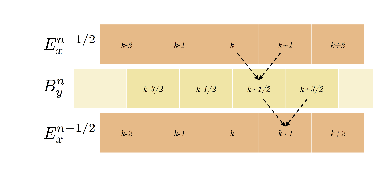

In [24]:
img=mpl.image.imread('yee.png');plt.imshow(img);plt.axis('off');

# Part II: Basic laser-plasma interaction and acceleration


In this part we will establish a theoretical basis of laser-plasma interactions. 

### 1.1 Vlasov-Maxwell system

Most generally we are interested in the evolution of a particle distribution in space, velocity and time $f(\vec x,\vec v,t)$. 
In a collisionless system, were particles are neither created or destroyed, the continuity equation is valid
$\frac{df}{dt}=\frac{\partial f}{\partial t} + \nabla_{x} \cdot\left(\frac{\partial \vec x}{\partial t}f\right) +\nabla_{p}\cdot\left(\frac{\partial \vec{v}}{\partial t}  f\right) = 0.$
In a electron-ion plasma, where the term $\partial_t \vec v$ is associated to the Lorentz force, we find that evolution of the distribution function is given by the Vlasov equations
$$ \frac{\partial f_e}{\partial t} + \vec {v}_e\cdot\nabla_{x} f_e - e\left(\vec {E}+\frac{\vec {v_e}}{c}\times\vec {B}\right)\cdot\nabla_{p} f_e = 0 $$
$$\frac{\partial f_i}{\partial t} + \vec {v}_i\cdot\nabla_{x} f_i + Z_i e\left(\vec {E}+\frac{\vec {v_i}}{c}\times\vec {B}\right)\cdot\nabla_{p} f_i = 0	$$

coupled to the Maxwell-equations (cgs-units)

$$
\nabla\times\vec {B} =\frac{4\pi\vec {j}}{c}+\frac{1}{c}\frac{\partial\vec {E}}{\partial t} \qquad \nabla\cdot\vec {B}  =0 \\
\nabla\times\vec {E} =-\frac{1}{c}\frac{\partial\vec {B}}{\partial t} \qquad
 \nabla\cdot\vec {E}  =4\pi\rho
$$
where $\rho=e\int(Z_i f_i-f_e)d^3p,\quad \vec {j}=e\int(Z_i f_i \vec{v}_i -f_e \vec{v}_e)d^3p.$



This set of equations completely describes the behavior of a collisionless plasma. However, in order to extract useful information from it we need a way to solve these equations in some way. In particle-in-cell (PIC) codes the Maxwell equations are solved on a numerical grid. Meanwhile the Vlasov equation is solved continuously using a set of macroparticles, each usually representing $\sim$ fC of charge, to probe the distribution function. PIC codes are the most popular numerical solver for this problem and were used throughout this work. Yet they are numerically demanding and to get first intuition how the laser-plasma interaction works we will pursue a reduced analytical approach.

## Sidenote: Normalized units

Equations are simplified and more clear as one introduces dimensionless variables. Those are obtained from SI units by normalization of masses with the electron mass $m_e$, velocities with the speed of light $c$, charges with the elementary charge $e$ and frequencies are given in units of the laser frequency $\omega_0$ or plasma frequency $\omega_p$. Densities are weighted with the equilibrium density $n_0$. 

**Normalized units are also very usefull in calculations, because they can increase the numerical precision. **

While the use of normalized units greatly simplifies equations and calculations, **the use of different unit systems can be very confusing and conversions have to be done carefully**. So following table summarizes some of the normalizations for common variables that result from the weightings mentioned above:

| physical variable        | $\vec{p}$           | $\vec{A}$  | $\vec{E}$  |
| ------------- |:-------------:| -----:| -----:|
| normalized by      | $m_e c$      |   $\frac{m_e c^2}{e}$  | $\frac{m_e c \omega_0}{e}$ |

Importantly, the potential $\vec A$ is normalized by $\frac{m_e c^2}{e}$, which means that the potential is normalized by 511 kV. In the literature this is often written as 
$$ \vec a = \frac{ e \vec A}{m_e c^2} $$
and the quantitu $a_0$ is defined as the peak amplitude of the normalized vector potential. For electrons **the transition from $a_0<1$ to $a_0>1$ corresponds to the transition from non-relativistic to relativistic optics**.

The electrical field is given in units of $\frac{m_e c \omega_0}{e}$, which is $\frac{2\pi m_e c^2}{e\lambda}$. So the normalized field is of the order of $2\pi\:\times$ 511kV $/\mu$m or 

$$E\mbox{ [TV/m]}\simeq 3.211\frac{a_0}{\lambda\:[\mu\mbox{m}]}$$

The intensity of the laser field is given by (in SI units)

$$I_0 = \frac{\epsilon_0 c}{2}|E_0|^2$$

which in normalized units reads

$$I_0 = \frac{\epsilon_0 c}{2}\left(  \frac{a_0}{2}  \frac{m_e c \omega_0}{e}  \right)^2 = \frac{\epsilon_0 c}{2}\left( \frac{a_0}{2} \frac{2\pi c}{\lambda_0}\frac{m_e c}{e}  \right)^2 $$

Note that many theory papers use Gaussian units which can be confusing ($\epsilon_0 \rightarrow 1/4\pi$ etc.). In practical units this simplifies to

$$ a_0 \simeq 0.8544 \times \lambda\:[\mu \mbox{m]} \times \sqrt{I_0\: [10^{18}\mbox{W/cm}^2]}   $$

### 1.2 One-dimensional plasma waves
Let us now consider a simplified set of equations, treating the plasma like a fluid. For the moment we are not interested in the velocity but the density distribution, which can be obtained by integrating Vlasov equation over velocity space d$^3v$, i.e. $\int\frac{\mathrm d}{\mathrm dt}f(x,v,t)\mathrm d^3v=0$. This leads to the continuity equation of particle density, whose unidimensional form is written as

$$ \partial_t n_e(z,t) + \partial_z j(z,t) = 0.$$

It is common to describe the interaction in a frame moving at the phase velocity $v_{\phi}$ along the $z$-axis

$$ \xi = z - v_{\phi}t \qquad \mbox{and} \qquad \tau = t$$

where the laser pulse appears only slowly varying in proper time $\tau$ and is nearly stationary. 

This quasi-static approximation allows us to express the differentials $\partial_{\xi}$ and $\partial_{\tau}$ in terms of the phase velocity of the pulse. Also, the electrodynamic Maxwell equations can be reduced to the electrostatic Poisson equation. As shown in \cite{Dopp:2012tt} this leads to the reduced system

$$\frac{d^2 \Phi (\xi,\tau)}{d \xi^2} = -k_p^2 \left( n_0(\tau)-n_e(\xi,\tau) \right) = k_p^2\delta n(\xi,\tau)$$

$$\delta n = n_e -n_0 = \left( \frac{1}{1-v_z/v_{\phi}}  -1\right)n_0$$

where we have expressed the current $j=-en_ev_z$ in terms of electron density $n_e$ and fluid velocity $v_z$. In the limit $\beta_{\phi}\rightarrow 1$ we get then

$$ \frac{1}{k_p^2}\frac{\partial^2}{\partial \xi^2} \Phi =   \frac{n_e}{n_0} - 1 = \frac{\beta}{1-\beta} = \frac{\beta}{1-\beta} \frac{\gamma}{\gamma}  = \frac{p_z}{\gamma - p_z}. $$

What is missing now is an expression for the particle momentum evolution $p_z$ in terms of the potential. Such can be found from the relativistic Lagrangian  for an electron in an external field $\Phi(\xi)$ 

$$ \mathcal{L} = -\sqrt{1-\beta_z^2} + \Phi(\xi),$$

which via Legendre transformation leads to the Hamiltonian 

$$\mathcal{H}= P\cdot\dot{\xi} - \mathcal{L} = p_z(\beta_z-\beta_{\phi}) -\mathcal{L} = -\frac{p_z}{\beta_z}(\beta_z^2-\beta_z\beta_{\phi})+\gamma^{-1} - \Phi(\xi) = -\gamma((1-\beta_z^2) + (1-\beta_{\phi}\beta_z)) + \gamma^{-1} - \Phi(\xi) = \gamma(1-\beta_z\beta_{\phi}) - \Phi(\xi).$$

As there is no explicit time dependence, the Hamiltonian is conserved $\mathcal{H}(t)=\mbox{const.}$, where the constant is defined by the initial conditions. For a particle initially at rest ($p_z(t=0) = 0$ and $\gamma(t=0) =1$) we find 

$$
\gamma = 1 + \Phi + p_z.
$$

It can be shown \cite{Dopp:2012tt} that the transverse particle momentum $p_{\perp}$ follows the vector potential $a$ and as the energy of a relativistic particle is given by $\gamma=\sqrt{1+p_{\perp}^2+p_{\parallel}^2}$, we find 

$$ \gamma = 1 + p_z \rightarrow \gamma^2 = 1 + 2p_z + p_z^2 = 1 + p_{\perp}^2 + p_z^2 = 1 + a^2 + p_z^2 $$

and therefore we find an equation for the longitudinal momentum

$$ {p_z} = \frac{1+\Phi}{2}\left( \frac{1+a^2}{(1+\Phi)^2} - 1 \right)
$$

From earlier we know that $1+\Phi=\gamma-p_z$ and so we can combine the above equations to the non-linear one-dimensional plasma wave equation

$$ \frac{\partial^2}{\partial \xi^2} \Phi =  \frac12\left( \frac{1+a^2}{(1+\Phi)^2} - 1 \right)k_p^2.$$


### The non-linear 1-D plasma wave equation

The proporties of the plasma wave equation are best explained interactively. The widget below solves the equation for different laser peak potential $a_0$ and pulse duration $\tau$. The plasma density is set by default to $n_e=10^{19}$ cm$^{-3}$.

In [25]:
from NumericalMethods import *

In [26]:
interactive_wakefield()

We observe to main dependencies:
* The form of the electric field in the wake of the laser changes from sinosoidal to sawtooth-like when $a_0$ increases.
* The field amplitude is basially suppressed for pulse durations longer than the plasma wavelength.

Let us first discuss the former. For small perturbations ($a_0\ll1$, $\Phi\ll1$) the non-linear wave equation can be approximated with

$$ \frac{\partial^2}{\partial \xi^2} \Phi =  \left( \frac{\langle a^2\rangle}{2} - \Phi \right)k_p^2.$$


### Laminar extension to 2-D

In the limit of low intensities, we can extend the 1-D wave equation to 2-D. The basic assumption is that electron motion is mostly laminar, i.e. electron do not move in transverse direction. In this case, we can solve the 1-D non-linear wave equation for each line along the beam profile defined by 

$$g(x)=e^{-\frac{x^2}{2w_0^2}}$$


In [27]:
interactive_wakefield2d()

## Numerical solution of the wave equation
We will now use python to solve the non-linear plasma wave equation. First we need to import a few libraries:

In [28]:
import numpy as np # Numerical methods
import matplotlib.pyplot as plt # plotting tools
import scipy.constants as const
%matplotlib inline

### Start with some physical constants, units etc.

We can use the physical constants to calculate the plasma frequency and wavelength 
$$\omega_p=\sqrt{\frac{n_ee^2}{m\epsilon_0}}\qquad,\qquad \lambda_p = 2\pi c/\omega_p$$
at a given density $n_e$.

In [29]:
n_e = 1e19*1e6   # n_e in [m^-3]
omega_p = np.sqrt((n_e*const.e**2)/(const.m_e*const.epsilon_0))
lambda_p = 2*np.pi*const.c/omega_p
kp = 2*np.pi/lambda_p
print 'The plasma wavelength is',lambda_p*1e6, 'um.'

The plasma wavelength is 10.5586657198 um.


The critical density $n_c$ is defined as the density for which $\lambda_p=\lambda_0$, where $\lambda_0$ denotes the laser wavelength, i.e.
$$ n_c = m_e \epsilon_0 \left( \frac{2\pi c}{ e\lambda_0} \right)^2 $$

In [30]:
lambda_0 = 0.8e-6
n_c = const.m_e*const.epsilon_0*((2*np.pi*const.c)/(const.e*lambda_0))**2
print 'The critical density is', n_c*1e-6, 'cm-3.'

The critical density is 1.74195971536e+21 cm-3.


### Solving the ODE

Now we can start to consider the ODE of the wave equation:
$$ \frac{\partial^2}{\partial \xi^2} \Phi =  \frac12\left( \frac{1+a^2}{(1+\Phi)^2} - 1 \right)k_p^2.$$

We can then translate the differential $\partial_{\xi}$ into a difference in terms of $\Delta\xi$ using the second order central-difference
$$\frac{\Phi_{i+1} - 2\Phi_{i}-\Phi_{i-1}}{\Delta \xi^2} =    \frac12\left(\frac{(1+a_i^2)}{(1+\Phi_{i})^2}-1\right)k_p^2$$   
which can be rearranged into the form
$$\Phi_{i+1}  =  2\Phi_{i}+\Phi_{i-1} + \frac12\left(\frac{(1+a_i^2)}{(1+\Phi_{i})^2}-1\right)\Delta \xi^2 k_p^2$$   

In [31]:
# define size of the "simulation box" [m]
xmin = 0e-6
xmax = 100e-6

# number of cells
nx = 5000
dx = (xmax-xmin)/nx

# setup mesh
x = np.linspace(xmin,xmax,nx)
phi = np.zeros(np.shape(x))

print 'The resolution is dx =' ,dx*1e6, 'um.'
print 'This is' , (lambda_p/(2*np.pi))/dx, 'dx per kp-1 and',(lambda_0)/dx, 'dx per lambda_0-1'

The resolution is dx = 0.02 um.
This is 84.0231920883 dx per kp-1 and 40.0 dx per lambda_0-1


In [32]:
#define a gaussian laser beam

# normalized peak potential
a0 = 1.

center = 20e-6

tau = 10e-15
ctau = const.c*tau

# calculate envelope and potential
envelope = a0*np.exp(-(x-center)**2/(2*ctau**2))
a = envelope * np.sin(x/lambda_0*2*np.pi)

In [33]:
nx = 10000

xi  = np.linspace(-1,4,num=nx)
dx  = xi[1]-xi[0]

A   = np.zeros([nx])
phi = np.zeros([nx])
E   = np.zeros([nx])
n   = np.zeros([nx])

periodes = 11.25
a0 = 2
A = a0*np.ones([nx])* np.sin(periodes*2*np.pi*xi)* np.sin(np.pi*(xi))**2/np.sqrt(2); #* sin(periodes*2*pi*xi);
A[1999:-1]= np.zeros([nx-2000])

for i in range(2,nx):
    phi[i]= 2*phi[i-1]-phi[i-2] + ((1+A[i]**2)/(1+phi[i-1])**2-1)*(2*np.pi)**2/2*dx**2;    


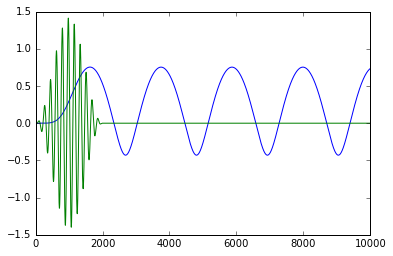

In [34]:
plt.plot(phi)
plt.plot(A)

## Calculating electron trajectories

In the last lecture we have discussed the use of central difference schemes to simulate the propagation of EM-waves. Today, we want to have a look at the interaction of EM-waves with free particles. 
Let us first define an function that returns the analytical results for a propagating laser pulse in vaccum.

$$ \vec E = \vec a \sin(\vec k \vec x-\omega t)$$
$$ \partial_t \vec B = -c\nabla\times \vec E$$

The Lorenz force that acts on the particle depends on the position, the time and the velocity of the particle:

$$ \frac{d \vec p(x,v,t)}{d t} = q(\vec E(x,t) - \vec v(t) \times \vec B(x,t))$$

However, due to the position dependence, this equation requires updated position information. The position of the particle at any moment $t$ is given by 

$$ \vec x(t) = x_0 + \int_{t_0}^t v(t) dt  .$$

But as the Lorenz force changes a particle's momentum, also the velocity needs to be updated
$$ \vec v(t) = v(t_0) + \int_{t_0}^t \frac{1}{m\gamma(t)}\frac{d\vec p(t)}{dt}  $$


As we discussed in the section about difference schemes, 1-point forward difference schemes have a very low resolution. This accumulative error is very problematic and it is imperative to use higher-order integration schemes, e.g. Runge Kutta methods. The standard scheme in laser-plasma simualtions is the Boris push, which is a Leap-Frog type second order particle pusher. 

$$
	\vec p'= \vec p^{n-1/2} + q \vec E \cdot \Delta t/2 $$
$$	\vec p''= \vec p' + q (\vec p '\times \vec B)\cdot \frac{1}{\sqrt{1+\vec p'^2}} \Delta t/2$$
$$	\vec p''' = \vec p' + q (\vec p ''\times \vec B)\cdot \frac{1}{\sqrt{1+\vec p'^2}} \cdot \frac{1}{1+\vec B^2}\Delta t/2 $$
$$	\vec p ^{n+1/2} = \vec p''' + q\vec E \cdot \Delta t/2 
$$

Let us compare the performance of forward integrator and Boris push in a simple example, a non-relativistic electron in a magnetic field:

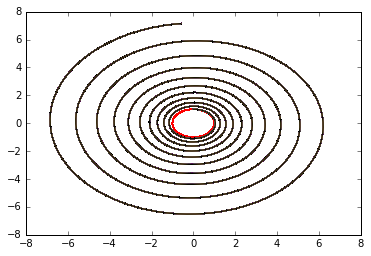

In [45]:
# Constants
m = const.m_e
q = -const.e
B = 1.0
omega = q*B/m
T = 2.0*np.pi/omega

# Initial conditions
Vx0 = 0.0
Vy0 = 1.0

# Time steps
steps = 1000
pts = steps + 1
dt = 10 * T / steps

Vx_F = np.zeros(shape=(pts,pts))
Vy_F = np.zeros(shape=(pts,pts))    
Vx_B = np.zeros(shape=(pts,pts))
Vy_B = np.zeros(shape=(pts,pts))

Vx_F[0] = Vx0
Vy_F[0] = Vy0
Vx_B[0] = Vx0
Vy_B[0] = Vy0

for i in range(1,steps+1):
  # Forward difference
  Vx_F[i] = Vx_F[i-1] + dt * omega * Vy_F[i-1]
  Vy_F[i] = Vy_F[i-1] - dt * omega * Vx_F[i-1]

  # Boris push
  t = q*dt*B/(2*m)
  VprimeX = Vx_B[i-1] + Vy_B[i-1] * t
  VprimeY = Vy_B[i-1] - Vx_B[i-1] * t

  s = 2.0*t/(1.0+pow(t,2.0))

  Vx_B[i] = Vx_B[i-1] + VprimeY * s
  Vy_B[i] = Vy_B[i-1] - VprimeX * s

plt.plot(Vx_B, Vy_B,'r')
plt.plot(Vx_F, Vy_F);